In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/crime_data.csv")

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Hierarical

In [4]:
#performing normalisation to scale the values
from sklearn.preprocessing import MinMaxScaler

In [5]:
#initializing
ms=MinMaxScaler()

In [6]:
df[["Murder","Assault","UrbanPop","Rape"]]=ms.fit_transform(df[["Murder","Assault","UrbanPop","Rape"]])

In [7]:
df_normal=df.iloc[:,1:]

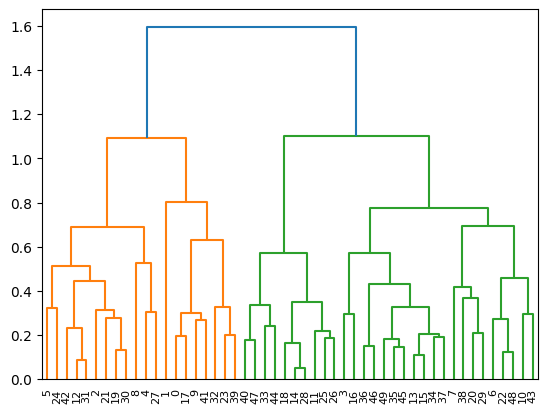

In [8]:
#creation of dendrogram
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df_normal,method="complete"))
plt.show()

In [9]:
# creation of hierarical clustering

In [10]:
from traitlets.traitlets import link
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete")

In [11]:
ag.fit(df_normal)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [12]:
 yag=ag.fit_predict(df_normal)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [13]:
yag

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [14]:
 df["cluster"]=yag

In [15]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,0.746988,0.654110,0.440678,0.359173,0
1,Alaska,0.554217,0.746575,0.271186,0.961240,0
2,Arizona,0.439759,0.852740,0.813559,0.612403,3
3,Arkansas,0.481928,0.496575,0.305085,0.315245,1
4,California,0.493976,0.791096,1.000000,0.860465,3
5,Colorado,0.427711,0.544521,0.779661,0.811370,3
6,Connecticut,0.150602,0.222603,0.762712,0.098191,1
7,Delaware,0.307229,0.660959,0.677966,0.219638,1
8,Florida,0.879518,0.993151,0.813559,0.635659,3
9,Georgia,1.000000,0.568493,0.474576,0.478036,0


In [16]:
#sorting the clusters into groups

In [17]:
df1=df.sort_values("cluster")

In [18]:
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,0.746988,0.654110,0.440678,0.359173,0
17,Louisiana,0.879518,0.698630,0.576271,0.385013,0
23,Mississippi,0.921687,0.732877,0.203390,0.253230,0
32,North Carolina,0.734940,1.000000,0.220339,0.227390,0
39,South Carolina,0.819277,0.801370,0.271186,0.392765,0
9,Georgia,1.000000,0.568493,0.474576,0.478036,0
1,Alaska,0.554217,0.746575,0.271186,0.961240,0
41,Tennessee,0.746988,0.489726,0.457627,0.506460,0
43,Utah,0.144578,0.256849,0.813559,0.403101,1
38,Rhode Island,0.156627,0.441781,0.932203,0.025840,1


In [19]:
df1.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'cluster'], dtype='object')

In [20]:
df1= df1.rename(columns={'Unnamed: 0':"state"})

In [21]:
df1


,state,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,0.746988,0.654110,0.440678,0.359173,0
17,Louisiana,0.879518,0.698630,0.576271,0.385013,0
23,Mississippi,0.921687,0.732877,0.203390,0.253230,0
32,North Carolina,0.734940,1.000000,0.220339,0.227390,0
39,South Carolina,0.819277,0.801370,0.271186,0.392765,0
9,Georgia,1.000000,0.568493,0.474576,0.478036,0
1,Alaska,0.554217,0.746575,0.271186,0.961240,0
41,Tennessee,0.746988,0.489726,0.457627,0.506460,0
43,Utah,0.144578,0.256849,0.813559,0.403101,1
38,Rhode Island,0.156627,0.441781,0.932203,0.025840,1


In [22]:
df1[["state","cluster"]]

,state,cluster
0,Alabama,0
17,Louisiana,0
23,Mississippi,0
32,North Carolina,0
39,South Carolina,0
9,Georgia,0
1,Alaska,0
41,Tennessee,0
43,Utah,1
38,Rhode Island,1


KMEANS

In [23]:
df2=pd.read_csv("/content/crime_data.csv")

In [24]:
dd=df2.copy()

In [25]:
dd.rename(columns={"Unnamed: 0":"state"})

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [26]:
df2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [27]:
#EDA

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [29]:
df2.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [30]:
df2.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [32]:
#scaling using standardscaler

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()

In [35]:
df2[["Murder","Assault","UrbanPop","Rape"]]= sc.fit_transform(df2[["Murder","Assault","UrbanPop","Rape"]])

In [36]:
df2

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814
5,Colorado,0.025976,0.402909,0.869548,1.883901
6,Connecticut,-1.040880,-0.736484,0.799761,-1.092723
7,Delaware,-0.437875,0.815030,0.450825,-0.585834
8,Florida,1.765415,1.990786,1.009122,1.150530
9,Georgia,2.229265,0.487757,-0.386621,0.492653


In [37]:
#finding the optimum no.of clusters

In [38]:
from sklearn.cluster import KMeans

In [39]:
#inertia calculates the within cluster sum of squares for clusters from 1 to 11
wcss1= []
for i in range(1,11):
  kmeans1=KMeans(n_clusters=i)
  kmeans1.fit(df2.iloc[:,1:])
  wcss1.append(kmeans1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [40]:
wcss1

[200.00000000000003,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.08743315681842,
 45.422526289950554,
 40.38062516610928,
 34.73506342602934,
 32.32098662262748,
 27.456079192040683]

<Axes: >

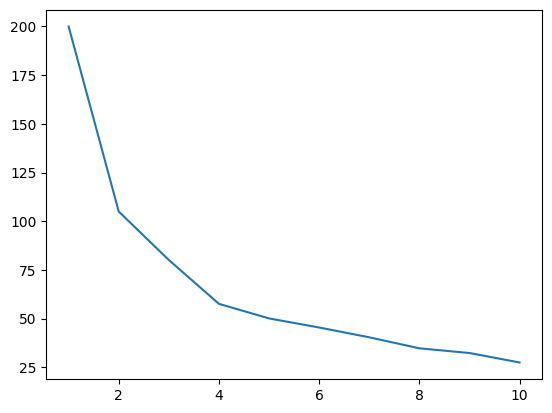

In [41]:
sns.lineplot(x=range(1,11),y=wcss1)

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
kmeans1 = KMeans(n_clusters=4)
predict1=kmeans1.fit_predict(df2.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
predict1

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [45]:
#Assign clusters to the data set
dd['clusterid'] = kmeans1.labels_

In [46]:
dd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [47]:
dd.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [48]:
data= dd.groupby("clusterid").mean().reset_index()
data

<ipython-input-48-e91160a50f77>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data= dd.groupby("clusterid").mean().reset_index()


,clusterid,Murder,Assault,UrbanPop,Rape
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [49]:
dd["state"][dd["clusterid"]==0]

6       Connecticut
7          Delaware
10           Hawaii
13          Indiana
15           Kansas
20    Massachusetts
29       New Jersey
34             Ohio
35         Oklahoma
36           Oregon
37     Pennsylvania
38     Rhode Island
43             Utah
45         Virginia
46       Washington
49          Wyoming
Name: state, dtype: object

In [50]:
dd["state"][dd["clusterid"]==1]

0            Alabama
3           Arkansas
9            Georgia
17         Louisiana
23       Mississippi
32    North Carolina
39    South Carolina
41         Tennessee
Name: state, dtype: object

In [51]:
label_0 = df2[predict1==0]
label_1 = df2[predict1==1]
label_2 = df2[predict1==2]
label_3 = df2[predict1==3]

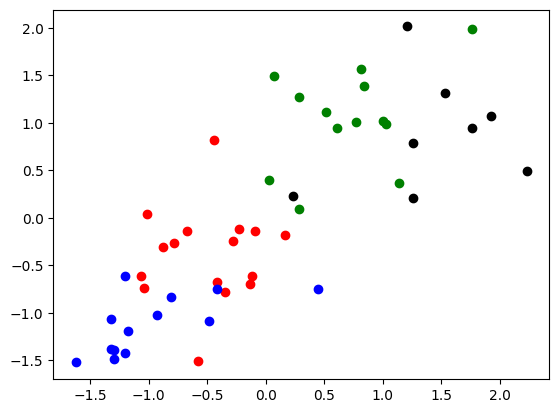

In [52]:
df3 = dd.iloc[:,1:]
cols = df3.columns

plt.scatter(label_0[cols[0]], label_0[cols[1]], color = 'red')
plt.scatter(label_1[cols[0]], label_1[cols[1]], color = 'black')
plt.scatter(label_2[cols[0]], label_2[cols[1]], color = 'green')
plt.scatter(label_3[cols[0]], label_3[cols[1]], color = 'blue')
plt.show()

In [53]:
cols

Index(['Murder', 'Assault', 'UrbanPop', 'Rape', 'clusterid'], dtype='object')

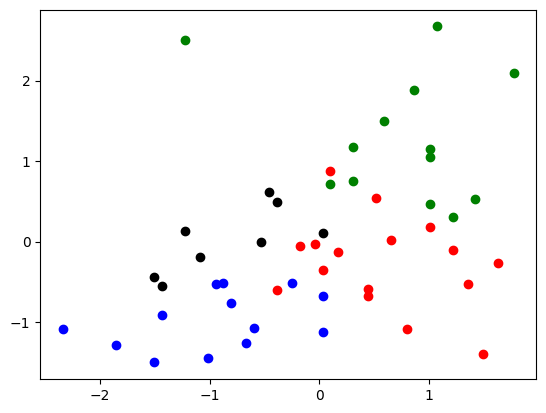

In [54]:
plt.scatter(label_0[cols[2]], label_0[cols[3]], color = 'red')
plt.scatter(label_1[cols[2]], label_1[cols[3]], color = 'black')
plt.scatter(label_2[cols[2]], label_2[cols[3]], color = 'green')
plt.scatter(label_3[cols[2]], label_3[cols[3]], color = 'blue')
plt.show()

In [104]:
#DBSCAN
from sklearn.cluster import DBSCAN

In [107]:
from sklearn.neighbors import NearestNeighbors
dtt=df2.iloc[:,1:]
nn = NearestNeighbors(n_neighbors=8)
nbrs = nn.fit(dtt)
distances,indices = nbrs.kneighbors(dtt)

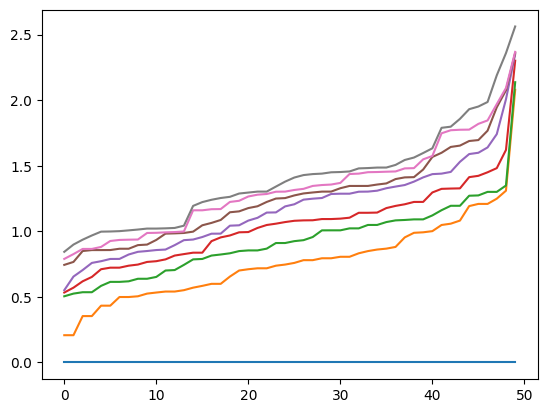

In [108]:
distances = np.sort(distances,axis=0)
#distances = distances[:,1]
plt.plot(distances)

In [109]:
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan.fit_predict(dtt)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1])

In [110]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1])

In [111]:
dtt['cluster']=dbscan.labels_
dtt.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,-1
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,-1
3,0.234708,0.233212,-1.084492,-0.186794,-1
4,0.281093,1.275635,1.776781,2.088814,-1


In [112]:
from sklearn.metrics import silhouette_score
silhouette_score(dtt,dtt["cluster"])

-0.03082769159859771

AIRLINES DATASET

In [55]:
file_path= "/content/EastWestAirlines.xlsx"

In [56]:
dt= pd.read_excel(file_path)

In [57]:
dt

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [58]:
dt=pd.read_excel("/content/EastWestAirlines.xlsx",sheet_name="data")
dt

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [59]:
 #EDA

In [60]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [61]:
dt.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [62]:
#scaling the dataset using standardscaler

In [63]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [64]:
dt[["Balance","Bonus_miles","Days_since_enroll"]]=ms.fit_transform(dt[["Balance","Bonus_miles","Days_since_enroll"]])

In [65]:
dt

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,0.016508,0,1,1,1,0.000660,1,0,0,0.843742,0
1,2,0.011288,0,1,1,1,0.000815,2,0,0,0.839884,0
2,3,0.024257,0,1,1,1,0.015636,4,0,0,0.847842,0
3,4,0.008667,0,1,1,1,0.001896,1,0,0,0.837955,0
4,5,0.057338,0,4,1,1,0.164211,26,2077,4,0.835905,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,0.010837,0,1,1,1,0.032330,4,200,1,0.168917,1
3995,4018,0.037766,0,1,1,1,0.003720,5,0,0,0.167953,1
3996,4019,0.043169,0,3,1,1,0.096505,8,0,0,0.168797,1
3997,4020,0.032202,0,1,1,1,0.001896,1,500,1,0.168676,0


In [66]:
#dropping unnecessary columns

In [67]:
dt.drop(columns=["cc1_miles","cc2_miles","cc3_miles"])

,ID#,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,0.016508,0,0.000660,1,0,0,0.843742,0
1,2,0.011288,0,0.000815,2,0,0,0.839884,0
2,3,0.024257,0,0.015636,4,0,0,0.847842,0
3,4,0.008667,0,0.001896,1,0,0,0.837955,0
4,5,0.057338,0,0.164211,26,2077,4,0.835905,1
...,...,...,...,...,...,...,...,...,...
3994,4017,0.010837,0,0.032330,4,200,1,0.168917,1
3995,4018,0.037766,0,0.003720,5,0,0,0.167953,1
3996,4019,0.043169,0,0.096505,8,0,0,0.168797,1
3997,4020,0.032202,0,0.001896,1,500,1,0.168676,0


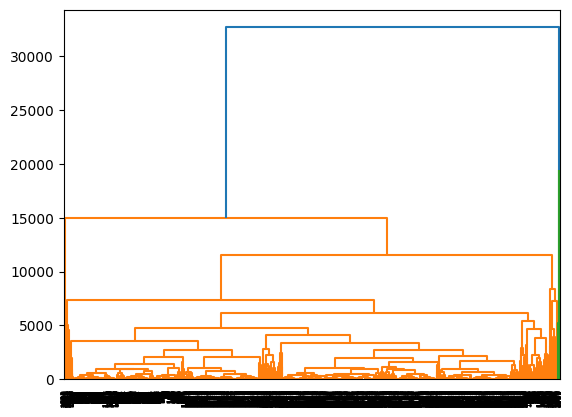

In [68]:
#creation of dendrogram
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(dt,method="complete"))
plt.show()

In [69]:
#creation of hierarical clustering
from traitlets.traitlets import link
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")

In [70]:
agg.fit(dt)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [71]:
yag1= agg.fit_predict(dt)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [72]:
yag1

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
dt["cluster"]=yag1

In [74]:
dt

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,0.016508,0,1,1,1,0.000660,1,0,0,0.843742,0,0
1,2,0.011288,0,1,1,1,0.000815,2,0,0,0.839884,0,0
2,3,0.024257,0,1,1,1,0.015636,4,0,0,0.847842,0,0
3,4,0.008667,0,1,1,1,0.001896,1,0,0,0.837955,0,0
4,5,0.057338,0,4,1,1,0.164211,26,2077,4,0.835905,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,0.010837,0,1,1,1,0.032330,4,200,1,0.168917,1,0
3995,4018,0.037766,0,1,1,1,0.003720,5,0,0,0.167953,1,0
3996,4019,0.043169,0,3,1,1,0.096505,8,0,0,0.168797,1,0
3997,4020,0.032202,0,1,1,1,0.001896,1,500,1,0.168676,0,0


In [75]:
#sorting the clusters into groups

In [76]:
dt2=dt.sort_values("cluster")

In [77]:
dt2[["ID#","cluster"]]

,ID#,cluster
0,1,0
2655,2675,0
2656,2676,0
2657,2677,0
2658,2678,0
...,...,...
3594,3617,2
3463,3486,2
1593,1608,2
3235,3257,2


KMEANS

In [78]:
dt1=pd.read_excel("/content/EastWestAirlines.xlsx",sheet_name="data")

In [79]:
dt3=dt1.copy()

In [80]:
dt1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [81]:
#EDA

In [82]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [83]:
dt_=dt1.drop(["ID#","Award?"],axis=1)

In [84]:
dt_

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [85]:
#scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled= sc.fit_transform(dt_)

In [86]:
#finding optimum number of clusters
from sklearn.cluster import KMeans

In [87]:
#inertia calculates the within cluster sum of squares for clusters from 1 to 11
wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(dt_)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [88]:
wcss

[42961820045654.625,
 20823632641126.684,
 11792330346621.46,
 7549630960898.067,
 5724599036035.635,
 4559668206278.383,
 3697320268607.134,
 3272010680013.082,
 2901863244039.7725,
 2626199889861.4346]

<Axes: >

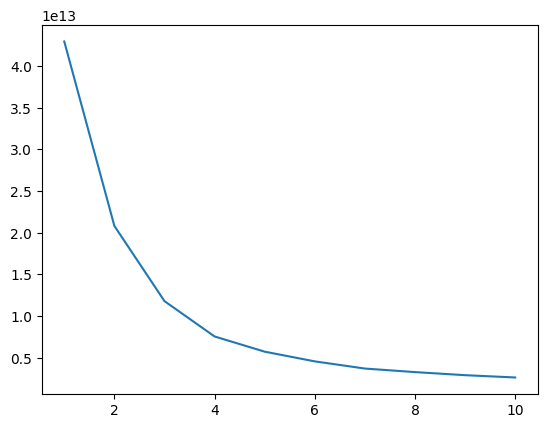

In [89]:
sns.lineplot(x=range(1,11),y=wcss)

In [90]:
from sklearn.metrics import silhouette_score

In [91]:
kmeans_=KMeans(n_clusters=4)

In [92]:
pred=kmeans_.fit_transform(dt_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [93]:
pred

array([[ 10832.21598331, 298060.43681733, 104965.11329228,
        816216.24244645],
       [ 15699.8617404 , 306860.88146819, 113481.25936627,
        825090.3684933 ],
       [ 12391.13413811, 284422.13536805,  91182.33079699,
        802765.10782532],
       ...,
       [ 45331.33835577, 250113.42775469,  55187.17304346,
        769422.65666968],
       [ 25863.13304052, 271592.78307354,  79722.66049905,
        789520.65300951],
       [ 29857.80297994, 322985.64693031, 129239.18151017,
        841309.35580491]])

In [94]:
#assign clusters to the dataset

In [95]:
dt3["clusters"]=kmeans_.labels_

In [96]:
dt3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [97]:
kmeans_.cluster_centers_

array([[3.10070448e+04, 1.01625623e+02, 1.66868327e+00, 1.01637011e+00,
        1.00498221e+00, 1.01091384e+04, 9.32953737e+00, 2.90204982e+02,
        8.83274021e-01, 3.78557046e+03],
       [3.23009849e+05, 3.37248649e+02, 3.14594595e+00, 1.01621622e+00,
        1.00000000e+00, 4.36441189e+04, 1.85837838e+01, 1.28333514e+03,
        3.88108108e+00, 5.53258378e+03],
       [1.28368880e+05, 2.19861963e+02, 2.94274029e+00, 1.00920245e+00,
        1.03271984e+00, 3.12665358e+04, 1.65143149e+01, 7.55497955e+02,
        2.15950920e+00, 4.74550102e+03],
       [8.42320231e+05, 5.12692308e+02, 3.34615385e+00, 1.00000000e+00,
        1.11538462e+00, 5.77971923e+04, 2.27307692e+01, 1.84588462e+03,
        6.96153846e+00, 6.46300000e+03]])

In [98]:
dt4=dt3.groupby("clusters").mean().reset_index()
dt4

,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,2195.256410,30972.230413,101.698006,1.668091,1.016382,1.004986,10102.236467,9.327991,290.091168,0.882479,3784.921652,0.324074
1,1,1245.600000,323009.848649,337.248649,3.145946,1.016216,1.000000,43644.118919,18.583784,1283.335135,3.881081,5532.583784,0.627027
2,2,1673.569388,128269.936735,219.413265,2.941837,1.009184,1.032653,31243.133673,16.504082,754.874490,2.159184,4745.401020,0.441837
3,3,863.423077,842320.230769,512.692308,3.346154,1.000000,1.115385,57797.192308,22.730769,1845.884615,6.961538,6463.000000,0.846154


In [99]:
dt3["ID#"][dt3["clusters"]==0]

0          1
1          2
2          3
3          4
5          6
        ... 
3994    4017
3995    4018
3996    4019
3997    4020
3998    4021
Name: ID#, Length: 2808, dtype: int64

In [100]:
dt3["ID#"][dt3["clusters"]==1]

8          9
32        33
45        46
63        64
68        69
        ... 
3235    3257
3247    3270
3315    3338
3417    3440
3788    3811
Name: ID#, Length: 185, dtype: int64

In [101]:
label_0 = dt_[pred==0]
label_1 = dt_[pred==1]
label_2 = dt_[pred==2]
label_3 = dt_[pred==3]

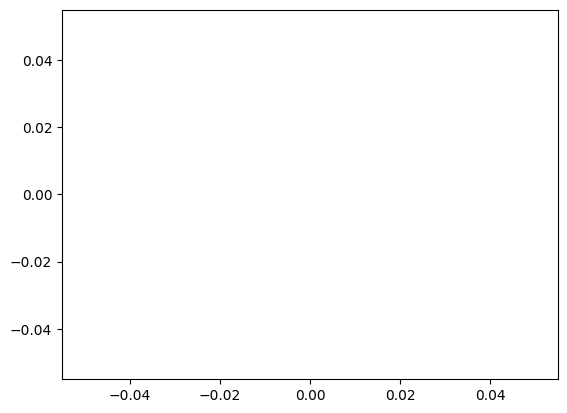

In [102]:
df4 = dt_.iloc[:,1:5]
cols1 = df4.columns

plt.scatter(label_0[cols1[2]], label_0[cols1[3]], color = 'red')
plt.scatter(label_1[cols1[2]], label_1[cols1[3]], color = 'black')
plt.scatter(label_2[cols1[2]], label_2[cols1[3]], color = 'green')
plt.scatter(label_3[cols1[2]], label_3[cols1[3]], color = 'blue')
plt.show()

In [113]:
#DBSCAN

In [114]:
from sklearn.cluster import DBSCAN

In [117]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=8)
nbrs = nn.fit(dt1)
distances1,indices = nbrs.kneighbors(dt1)

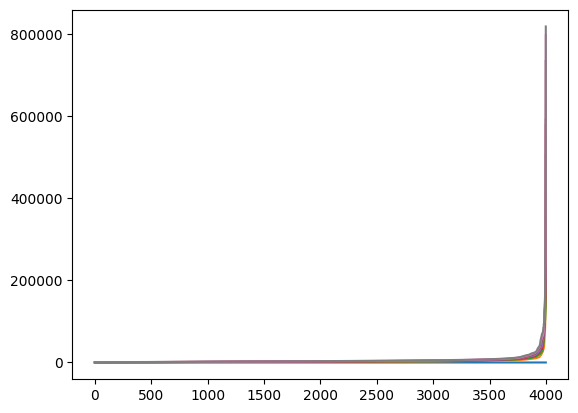

In [118]:
distances1= np.sort(distances1,axis=0)
#distances = distances[:,1]
plt.plot(distances1)

In [119]:
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan.fit_predict(dt1)

array([-1, -1, -1, ..., -1, -1, -1])

In [120]:
dt1['cluster']=dbscan.labels_
dt1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,-1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,-1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,-1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,-1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
